In [4]:
conda install -c conda-forge lightgbm

done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.4.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.4.0



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from datetime import date
from scipy.stats import norm
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_squared_error


pio.templates.default = "plotly"


pd.set_option('display.max_columns', None)


%matplotlib inline


In [7]:
data_orig = pd.read_csv('immo_data.csv', header=0)
data_orig

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.00,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.40,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,NaN,1871.0,111378734,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,1300.0,2019.0,113147523,1.0,NaN,False,Sachsen,True,9.0,965.0,4,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,NaN,1964.0,108890903,NaN,district_heating,False,Sachsen,False,2.0,343.0,35,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2,other,9599,3.0,86.00,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,903.0,1950.0,114751222,NaN,gas,False,Bremen,False,1.0,765.0,10,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3.0,188.90,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,NaN,False,True,0,2.74,10.0,910.0,2016.0,115641081,1.0,geothermal,False,Bayern,True,9.0,820.0,NaN,90.00,Weilheim_Schongau_Kreis,mint_condition,sophisticated,no,no_information,NaN,False,6,roof_storey,82390,3.0,NaN,NaN,NaN,3,False,4,Weilheim_Schongau_Kreis,Eberfing,"Diese schöne, neuwertige Wohnung im Dachgescho...",Fliesen und Parkett. Sichtbarer Dachstuhl.,NaN,NaN,NaN,NaN,NaN,Feb20
268846,Hessen,220.00,gas_heating,NaN,NaN,False,True,12,6.49,NaN,1150.0,1983.0,96981497,1.0,gas,True,Hessen,False,4.0,930.0,NaN,115.00,Bergstraße_Kreis,well_kept,sophisticated,negotiable,no_information,NaN,False,6,apartment,68519,3.5,NaN,1.0,1.0,3,False,5,Bergstraße_Kreis,Viernheim,Hier wird eine Wohnung im 2 Familienhaus angeb...,"Parkett, Kamin, Badewanne&Dusche\nGroßer Balko...",NaN,NaN,2015.0,NaN,NaN,May19
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,NaN,False,True,21,2.90,40.0,930.0,1965.0,66924271,1.0,gas,False,Hessen,True,2.0,650.0,10,95.00,Limburg_Weilburg_Kreis,well_kept,NaN,negotiable,Emsbachstrasse,Emsbachstrasse,False,5,apartment,65552,4.0,160.77,1.0,2.0,4,True,4,Limburg_Weilburg_Krei

In [9]:
data = data_orig.copy()

Получим основную информацию о наших данных

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [15]:
Мы используем следующие команды, чтобы получить обзор данных:

SyntaxError: invalid syntax (1339402873.py, line 1)

In [14]:
# rental_data.head()
# rental_data.tail()
# rental_data.shape

# rental_data.select_dtypes(exclude=['object']).columns
# len(rental_data.select_dtypes(exclude='object').columns)
# rental_data.select_dtypes(exclude=['object']).describe().round(decimals=2)

# rental_data.select_dtypes(include=['object']).columns
# len(rental_data.select_dtypes(include='object').columns)
# rental_data.select_dtypes(include=['object']).describe()

### Пропущенные значения

Функция `missing_values` выдаст нам процент нулевых значений для каждого столбца.

In [11]:
def missing_values(df,norows):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = ((df.isnull().sum().sort_values(ascending=False)/df.shape[0])*100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return(missing_data.head(norows))


In [18]:
missing_values(rental_data_copy,len(rental_data_copy))

NameError: name 'rental_data_copy' is not defined

Теперь посмотрим, насколько сильно коррелируют числовые признаки с целевой переменной и между собой

In [79]:
data_corr_columns = []
for c in data:
    if data[c].dtypes != 'object':
        data_corr_columns.append(c) 

In [80]:
data_corr = data[data_corr_columns].corr()
data_corr

,BHK,Rent,Size
BHK,1.000000,0.369718,0.716145
Rent,0.369718,1.000000,0.413551
Size,0.716145,0.413551,1.000000


Получили вывод, что переменная BHK хуже остальных коррелирует с целевой переменной, и достаточно сильно - с остальными переменными. Удалим данный признак из нашей таблицы

In [81]:
data.drop(['BHK'], axis=1, inplace=True)
data

,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Point of Contact
0,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,Contact Owner
1,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner
2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner
3,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,Contact Owner
4,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,Contact Owner
...,...,...,...,...,...,...,...
4741,15000,1000,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,Contact Owner
4742,29000,2000,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,Contact Owner
4743,35000,1750,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,Contact Agent
4744,45000,1500,Carpet Area,Hyderabad,Semi-Furnished,Family,Contact Agent


### Построение гистограмм и графиков

Очистим наши данные от выбросов

In [84]:
data = data[data['Rent'] < 300000]
data = data[data['Size'] < 8000]
data = data[data['Area Type'] != 'Built Area']
data = data[data['Point of Contact'] != 'Contact Builder']

К каждому из категориальных признаков отобразим:
- Гистограмму, в которой отображено, насколько часто в таблице встречается то или иное значение признака
- График "Rent-Size", в котором отображено, насколько сильно друг от друга отличаются данные значения, сгруппированные по значениям признаков (пришли к выводу, что Rent и Size при группировке по любому признаку практически не отличаются)
- График распределения значения Rent по каждому из значений рассматриваемого признака

Area Type


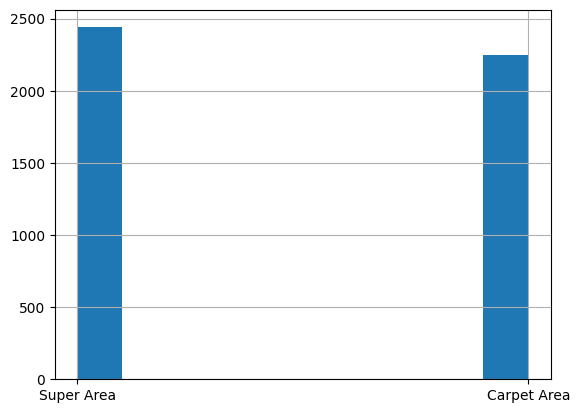

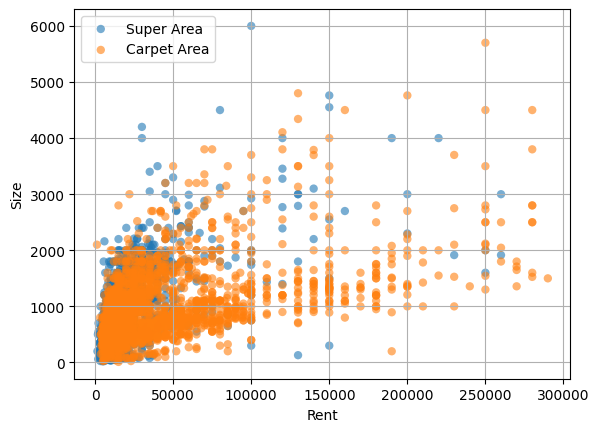

Super Area


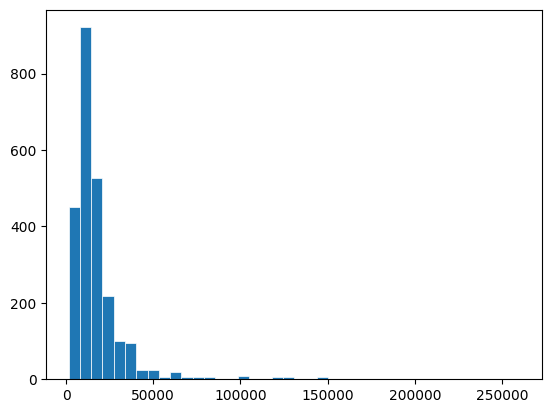

Carpet Area


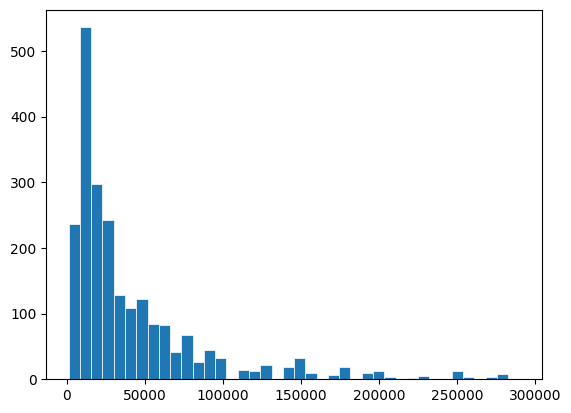

City


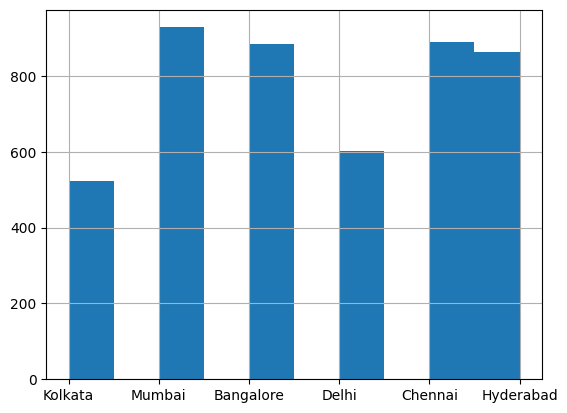

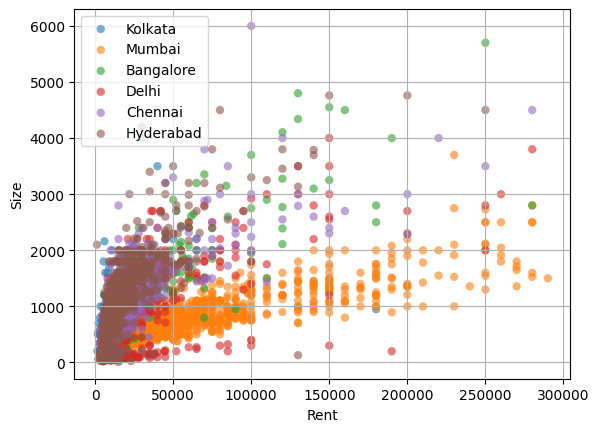

Kolkata


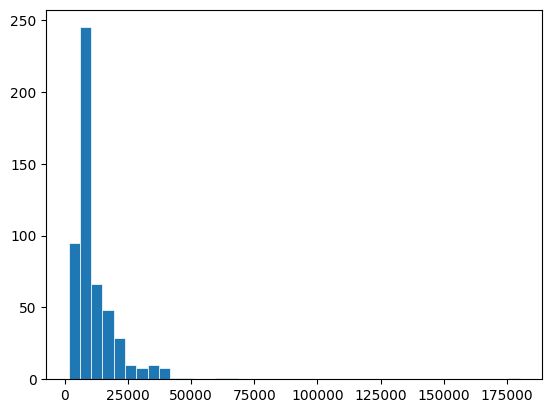

Mumbai


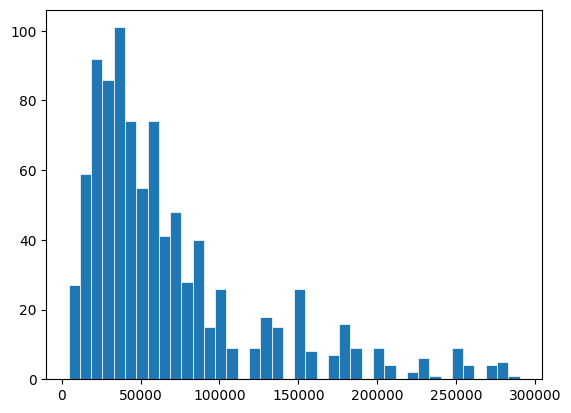

Bangalore


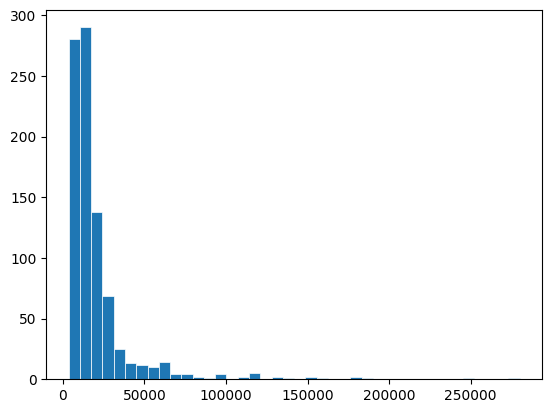

Delhi


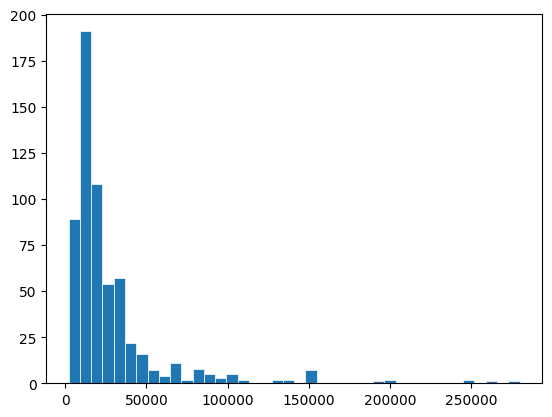

Chennai


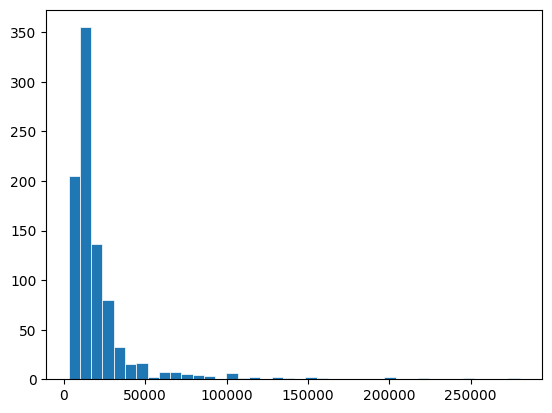

Hyderabad


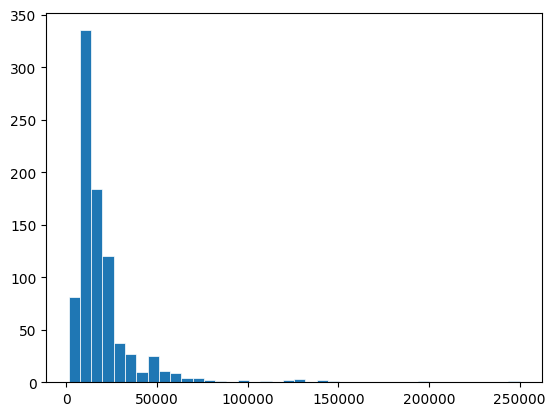

Furnishing Status


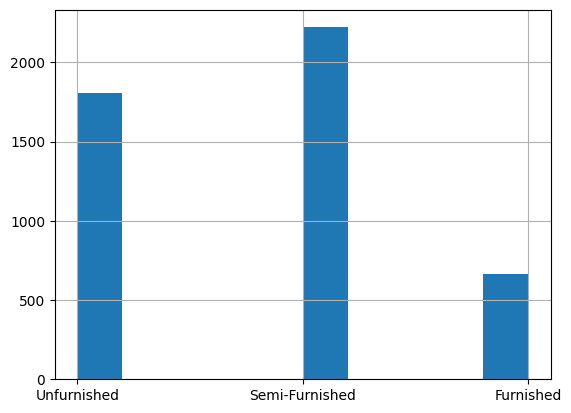

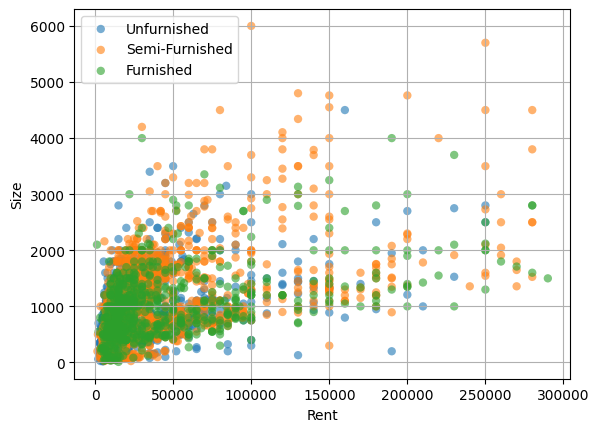

Unfurnished


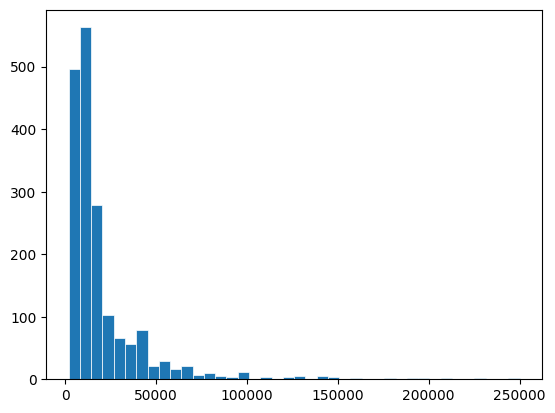

Semi-Furnished


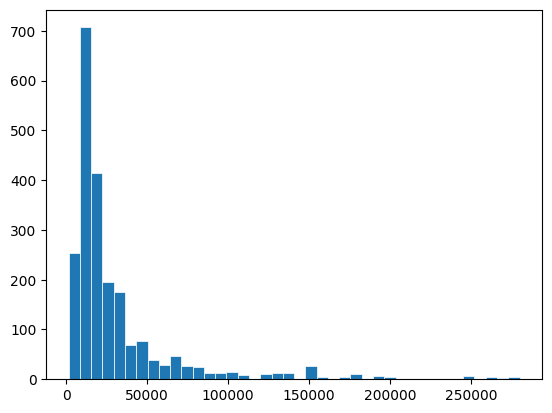

Furnished


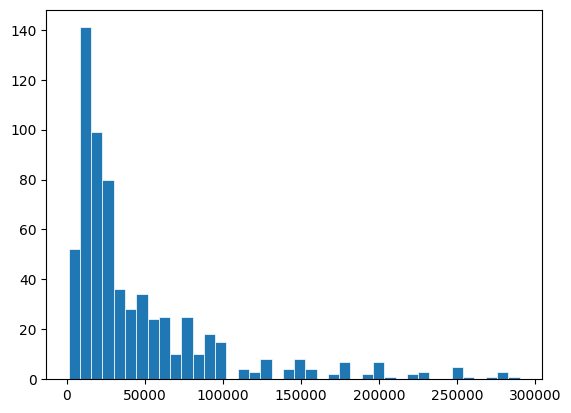

Tenant Preferred


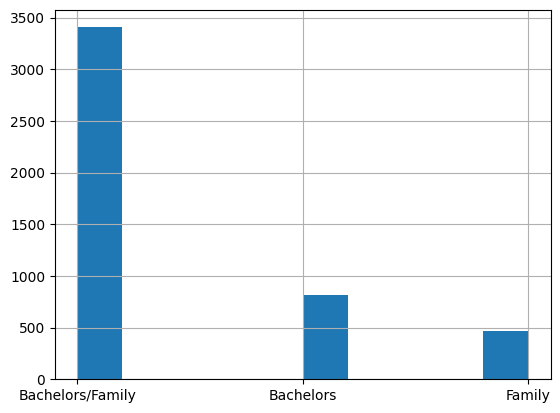

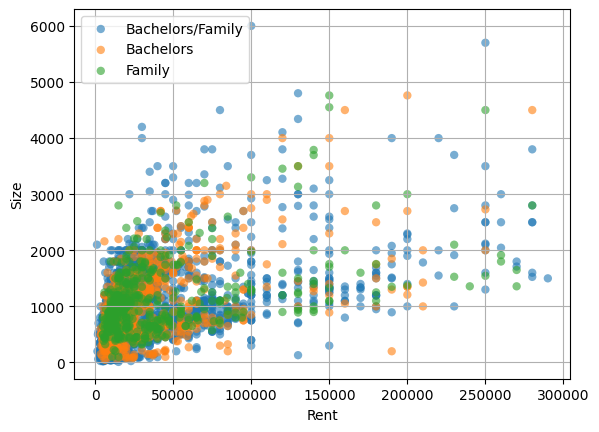

Bachelors/Family


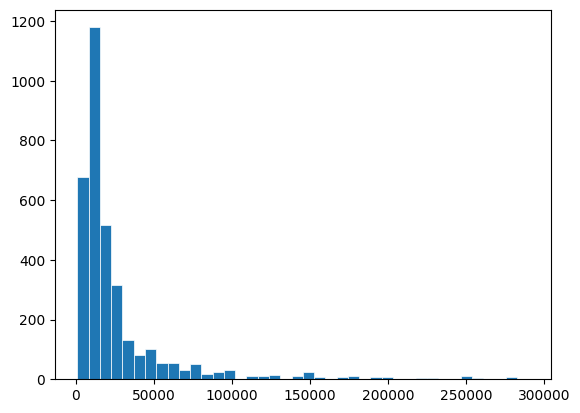

Bachelors


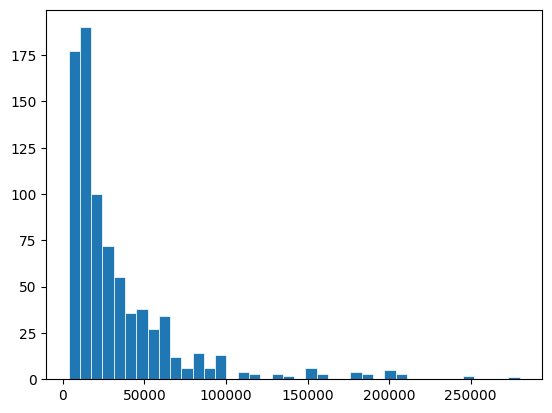

Family


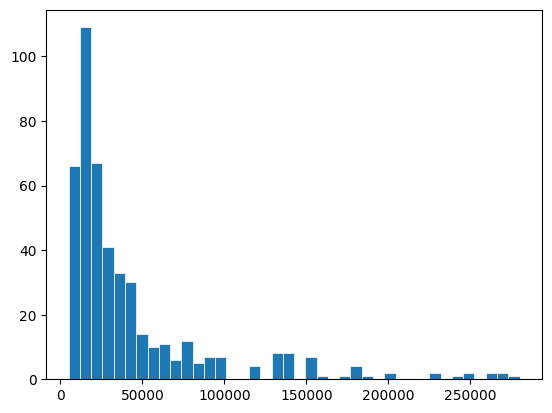

Point of Contact


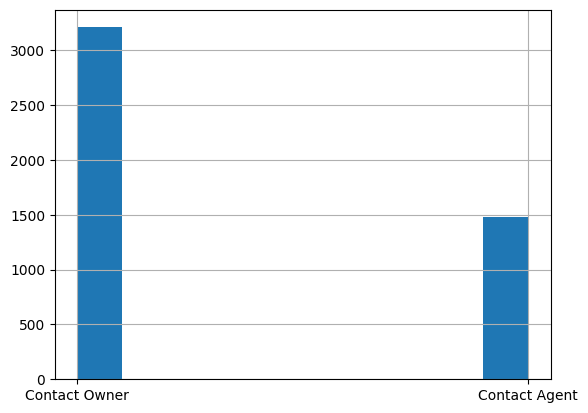

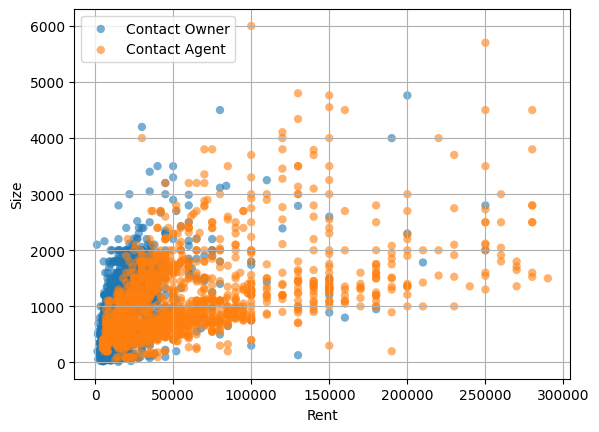

Contact Owner


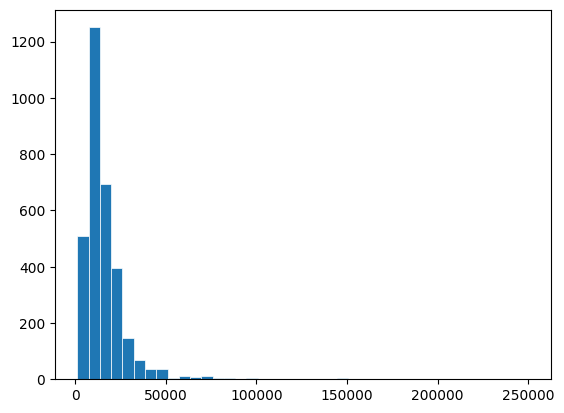

Contact Agent


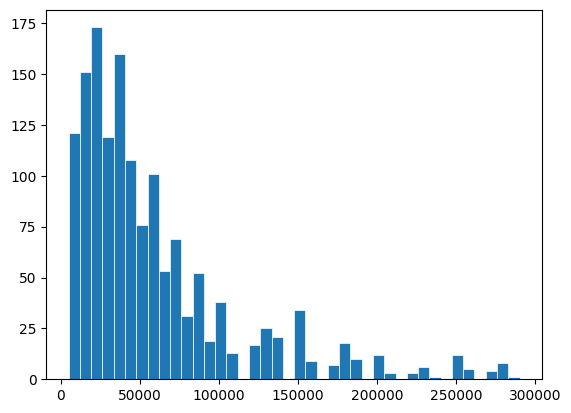

In [85]:
for col in data.select_dtypes(include=['object']):
    print(col)
    data[col].hist()
    
    i = 0
    fig, ax = plt.subplots()
    for val in data[col].unique():
        d = data[data[col] == val]
        x = d['Rent']
        y = d['Size']
        ax.set_xlabel('Rent')
        ax.set_ylabel('Size')
        ax.scatter(x, y, label=val, alpha=0.6, edgecolors='none')

    ax.legend()
    ax.grid(True)
    plt.show()

    for val in data[col].unique():
        fig, ax = plt.subplots()
        d = data[data[col] == val]
        ax.hist(d['Rent'], bins=40, linewidth=0.5, edgecolor="white")
        
        # ax.set(xlim=(0, 300000), ylim=(0, 6000))
        print(val)
        plt.show()

Отобразим распределение переменной Rent

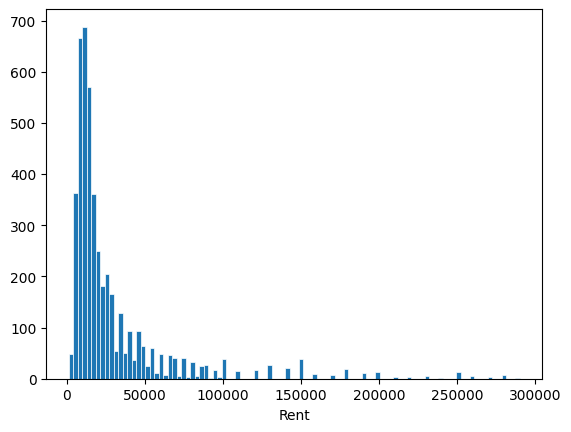

In [86]:
i = 0
fig, ax = plt.subplots()
ax.hist(data['Rent'], bins=100, linewidth=0.5, edgecolor="white")
ax.set_xlabel('Rent')
plt.show()

## Реализация генератора данных

In [87]:
data

,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Point of Contact
0,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,Contact Owner
1,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner
2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner
3,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,Contact Owner
4,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,Contact Owner
...,...,...,...,...,...,...,...
4741,15000,1000,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,Contact Owner
4742,29000,2000,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,Contact Owner
4743,35000,1750,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,Contact Agent
4744,45000,1500,Carpet Area,Hyderabad,Semi-Furnished,Family,Contact Agent


Если обратить внимание на гистограмму из прошлого шага, то можно заметить, что она приблизительно представляет собой логнормальное распределение. Чтобы в этом убедиться, возьмём логарифм от представленных данных

<Axes: xlabel='Rent', ylabel='Count'>

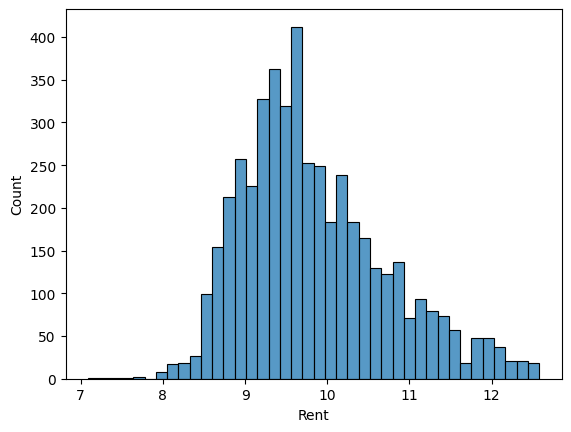

In [88]:
sns.histplot(np.log1p(data['Rent']))

Проверим распределение на нормальность через тест Колмогорова-Смирнова

In [89]:
loc, scale = norm.fit(np.log1p(data['Rent']))
n = norm(loc=loc, scale=scale)
kstest(np.log1p(data['Rent']), n.cdf)

KstestResult(statistic=0.09784126832970236, pvalue=1.5937227665495498e-39, statistic_location=9.61587214452889, statistic_sign=1)

Значение p вышло меньше, чем 0.05, следовательно мы можем считать распределение нормальным (отклоняем нулевую гипотезу)

Будем рассматривать распределение логарифмов значений Rent как нормальное распределение. Для моделирования узнаем среднее значение и стандартное отклонение представленной гистограммы

In [90]:
np.log1p(data['Rent']).describe()

count    4689.000000
mean        9.843674
std         0.881246
min         7.090910
25%         9.210440
50%         9.680406
75%        10.373522
max        12.577640
Name: Rent, dtype: float64

Тот же процесс проделаем и со значением Size. Отобразим распределение переменной Rent и приведём к нормальному виду через логарифмирование

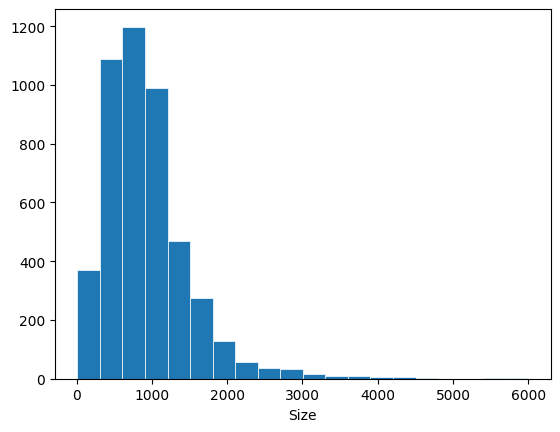

In [91]:
i = 0
fig, ax = plt.subplots()
ax.hist(data['Size'], bins=20, linewidth=0.5, edgecolor="white")
ax.set_xlabel('Size')
plt.show()

<Axes: xlabel='Rent', ylabel='Count'>

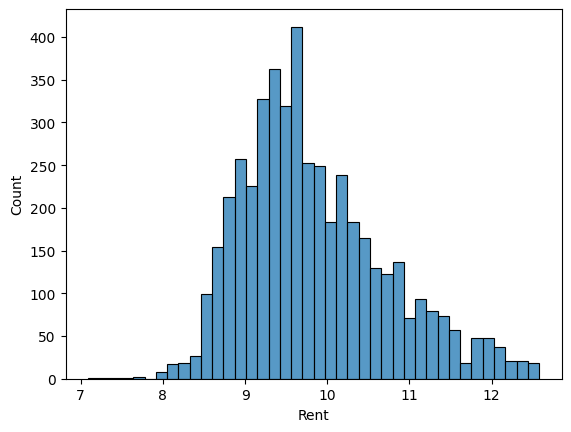

In [93]:
sns.histplot(np.log1p(data['Rent']))

Проверим распределение на нормальность через тест Колмогорова-Смирнова

In [94]:
loc, scale = norm.fit(np.log1p(data['Size']))
n = norm(loc=loc, scale=scale)
kstest(np.log1p(data['Size']), n.cdf)

KstestResult(statistic=0.09435264142481226, pvalue=8.818374536667808e-37, statistic_location=6.398594934535208, statistic_sign=-1)

Значение p вышло меньше, чем 0.05, следовательно мы можем считать распределение нормальным (отклоняем нулевую гипотезу)

Будем рассматривать распределение логарифмов значений Size как нормальное распределение. Для моделирования узнаем среднее значение и стандартное отклонение представленной гистограммы

In [95]:
np.log1p(data['Size']).describe()

count    4689.000000
mean        6.654620
std         0.698059
min         2.397895
25%         6.311735
50%         6.740519
75%         7.090910
max         8.699681
Name: Size, dtype: float64

In [97]:
def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

In [118]:
X_rent = get_truncated_normal(mean=np.log1p(data['Rent']).mean(), sd=np.log1p(data['Rent']).std(), low=np.log1p(data['Rent']).min(), upp=np.log1p(data['Rent']).max())
X_size = get_truncated_normal(mean=np.log1p(data['Size']).mean(), sd=np.log1p(data['Size']).std(), low=np.log1p(data['Size']).min(), upp=np.log1p(data['Size']).max())

In [115]:
array_of_weights = []
for col in data.select_dtypes(include=['object']):
    print(col)
    lst = []
    for val in data[col].unique():
        #print(val)
        x = data[col].value_counts()[val] / len(data)
        lst.append(x)
    print(lst, sum(lst))
    array_of_weights.append(lst)
print(array_of_weights)

Area Type
[0.5203668159522287, 0.4796331840477714] 1.0
City
[0.11175090637662614, 0.1979100021326509, 0.18852633823843037, 0.12838558328001706, 0.18937939859245043, 0.18404777137982511] 1.0
Furnishing Status
[0.38494348475154616, 0.4736617615696311, 0.1413947536788228] 1.0
Tenant Preferred
[0.7263808914480699, 0.1746641074856046, 0.09895500106632545] 1.0
Point of Contact
[0.6843676690125826, 0.3156323309874174] 1.0
[[0.5203668159522287, 0.4796331840477714], [0.11175090637662614, 0.1979100021326509, 0.18852633823843037, 0.12838558328001706, 0.18937939859245043, 0.18404777137982511], [0.38494348475154616, 0.4736617615696311, 0.1413947536788228], [0.7263808914480699, 0.1746641074856046, 0.09895500106632545], [0.6843676690125826, 0.3156323309874174]]


In [122]:
data_from_model = []
for i in range(4000):
    rent = X_rent.rvs()
    size = X_size.rvs()
    area_type = random.choices(data['Area Type'].unique(), weights=array_of_weights[0])[0]
    city = random.choices(data['City'].unique(), weights=array_of_weights[1])[0]
    furnishing_status = random.choices(data['Furnishing Status'].unique(), weights=array_of_weights[2])[0]
    tenant_preferred = random.choices(data['Tenant Preferred'].unique(), weights=array_of_weights[3])[0]
    point_of_contact = random.choices(data['Point of Contact'].unique(), weights=array_of_weights[4])[0]
    line = {
        'Rent':(np.exp(1) ** rent) - 1,
        'Size':(np.exp(1) ** size) - 1,
        'Area Type':area_type,
        'City':city,
        'Furnishing Status':furnishing_status,
        'Tenant Preferred':tenant_preferred,
        'Point of Contact':point_of_contact}
    data_from_model.append(line)
data_from_model = pd.DataFrame(data_from_model)
data_from_model

,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Point of Contact
0,34254.741758,1757.356309,Super Area,Kolkata,Unfurnished,Bachelors/Family,Contact Owner
1,4382.263097,2582.514790,Carpet Area,Delhi,Semi-Furnished,Bachelors/Family,Contact Agent
2,23470.713040,1416.974609,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,Contact Owner
3,13997.358715,471.590109,Carpet Area,Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner
4,2489.500464,3662.983818,Super Area,Delhi,Unfurnished,Bachelors/Family,Contact Owner
...,...,...,...,...,...,...,...
3995,29490.441351,492.664422,Carpet Area,Mumbai,Unfurnished,Family,Contact Agent
3996,26439.769106,1780.516520,Carpet Area,Bangalore,Semi-Furnished,Bachelors/Family,Contact Owner
3997,85909.884376,639.097645,Super Area,Chennai,Semi-Furnished,Bachelors/Family,Contact Owner
3998,5795.943726,815.938287,Super Area,Chennai,Furnished,Bachelors,Contact Owner


Area Type


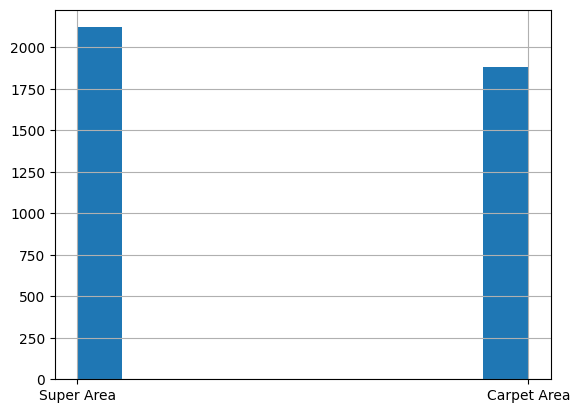

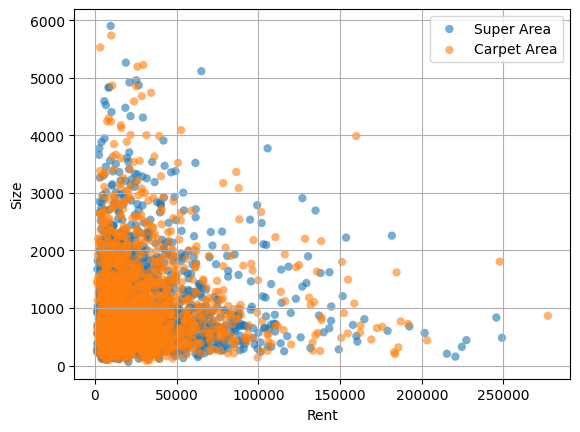

Super Area


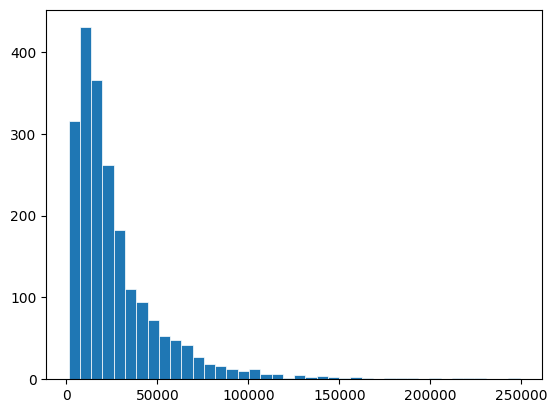

Carpet Area


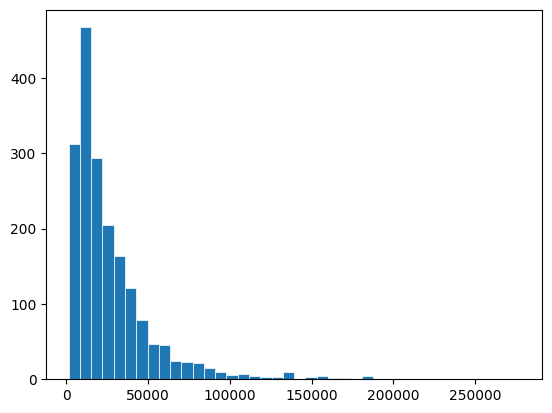

City


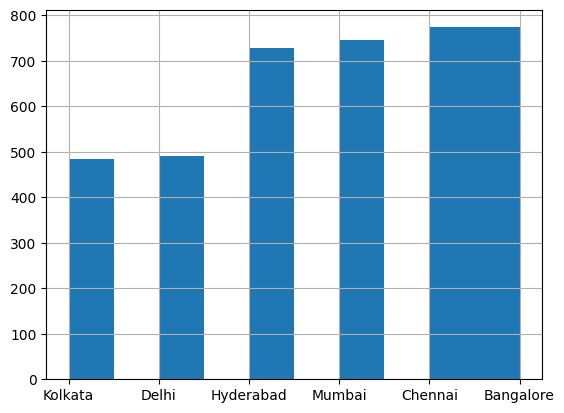

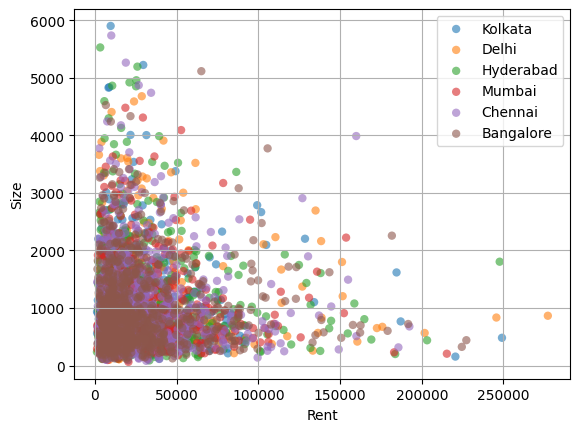

Kolkata


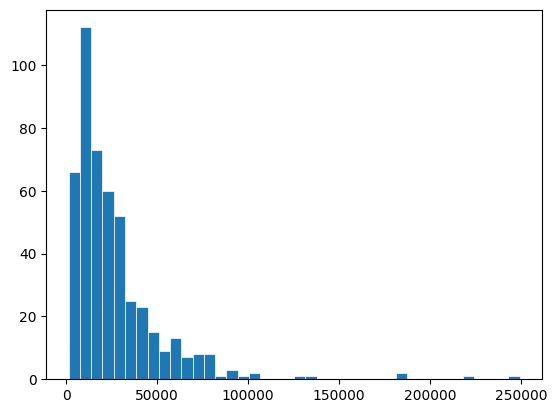

Delhi


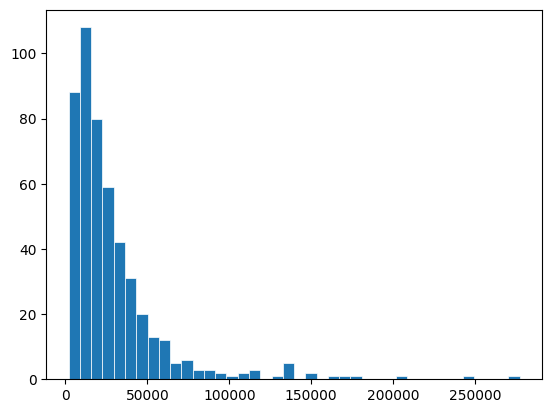

Hyderabad


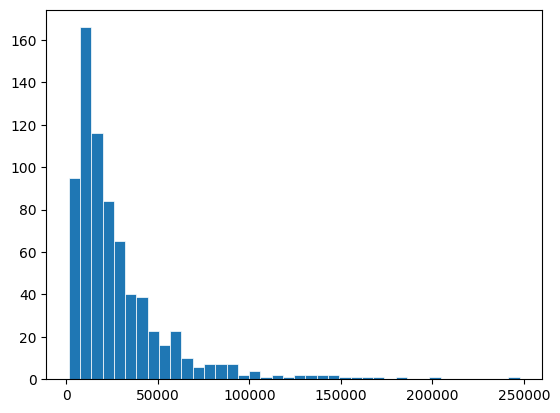

Mumbai


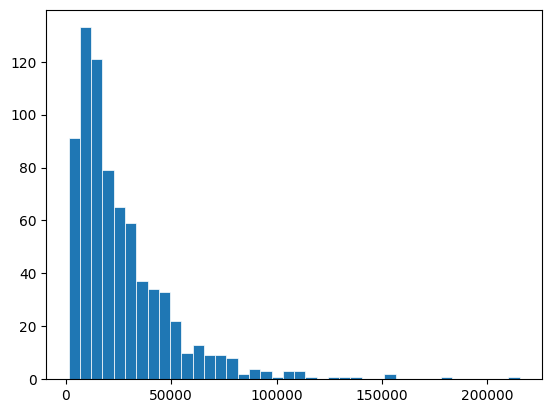

Chennai


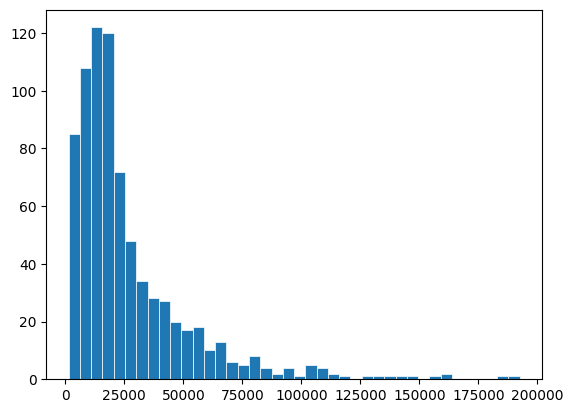

Bangalore


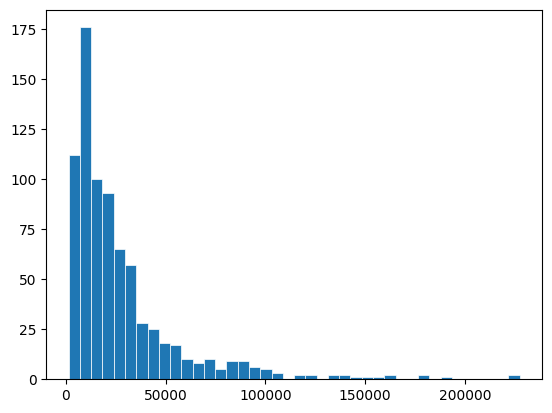

Furnishing Status


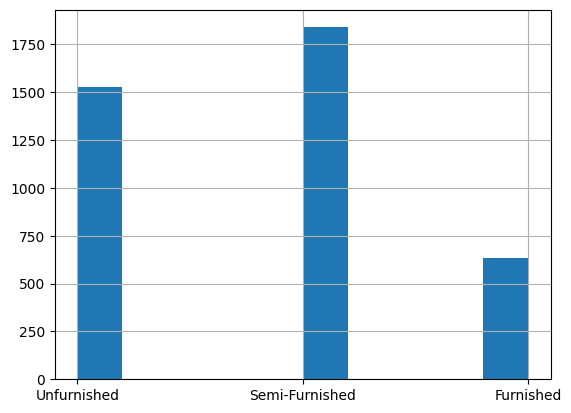

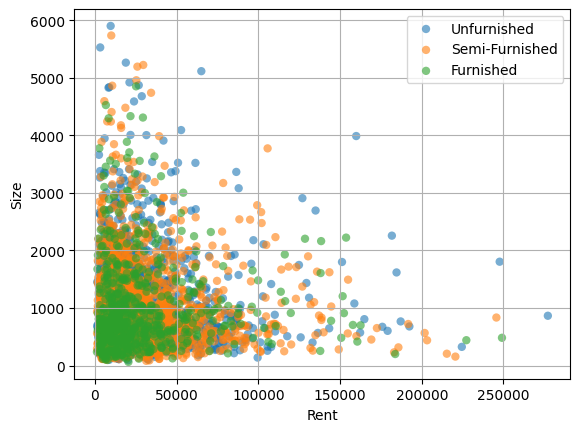

Unfurnished


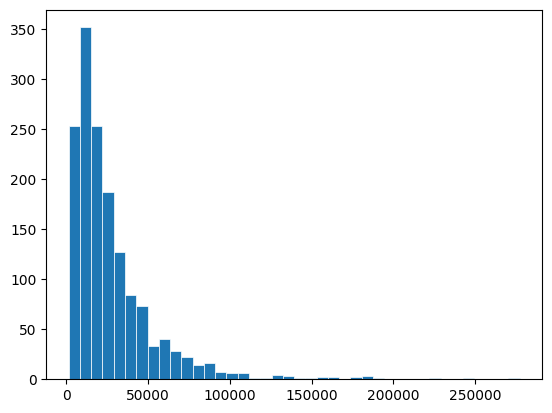

Semi-Furnished


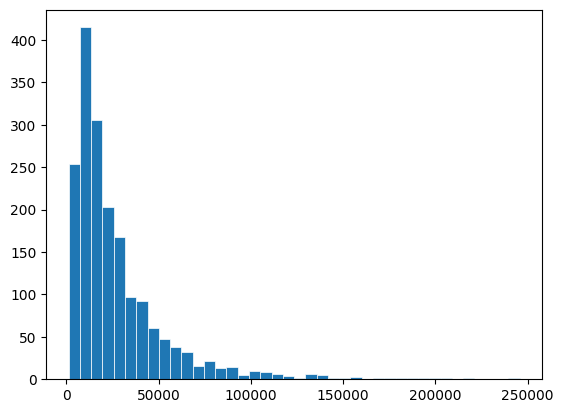

Furnished


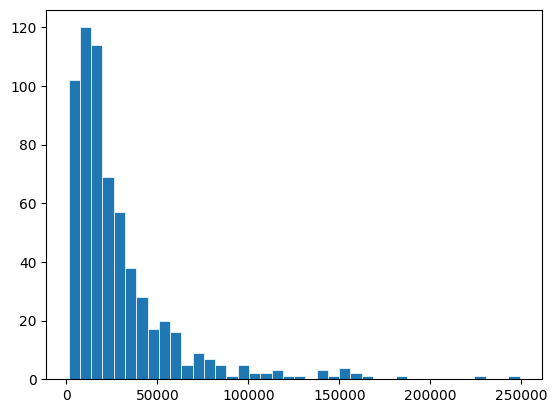

Tenant Preferred


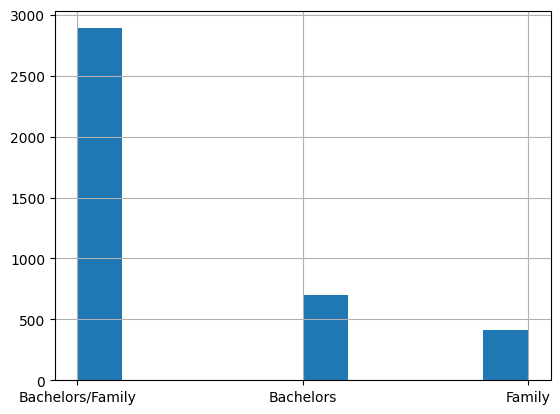

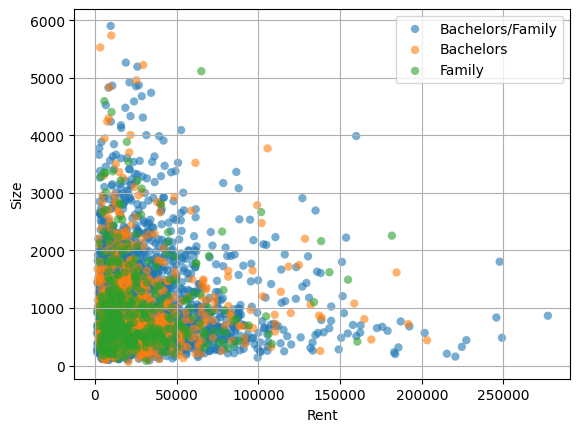

Bachelors/Family


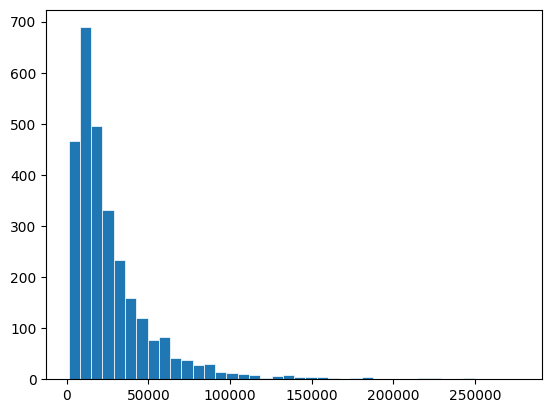

Bachelors


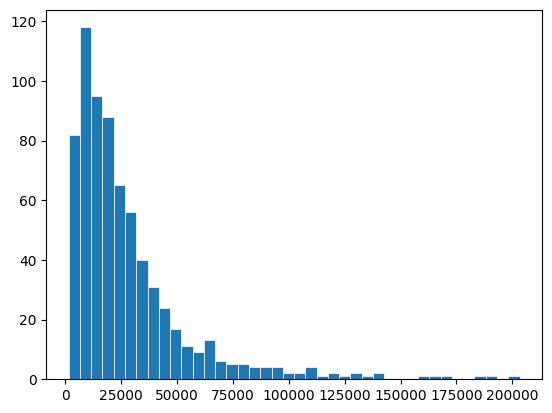

Family


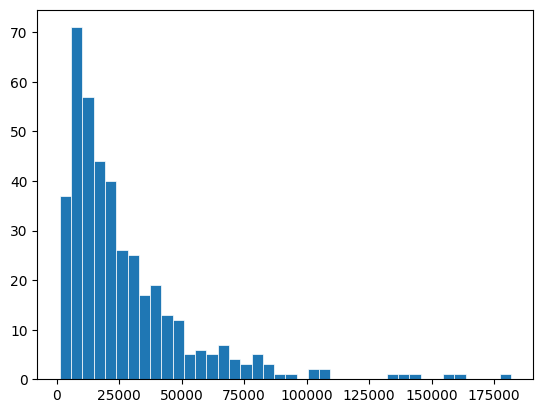

Point of Contact


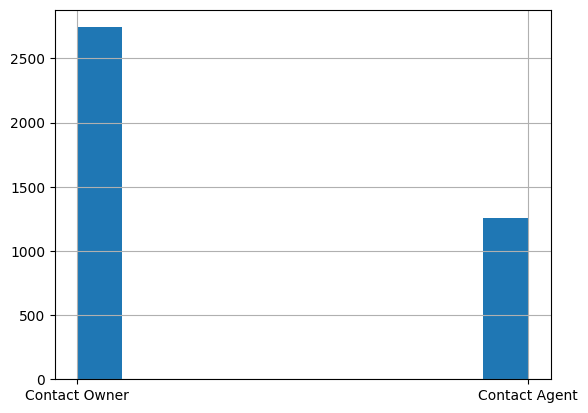

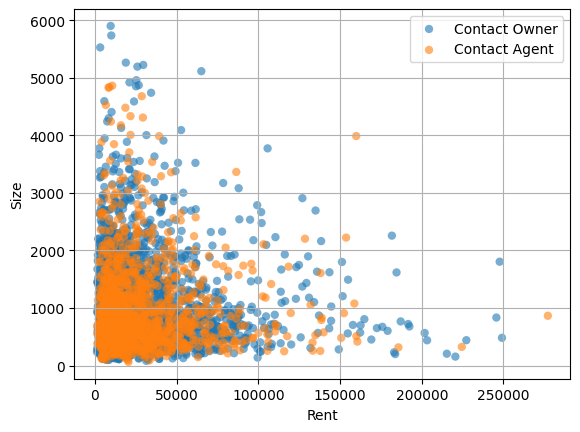

Contact Owner


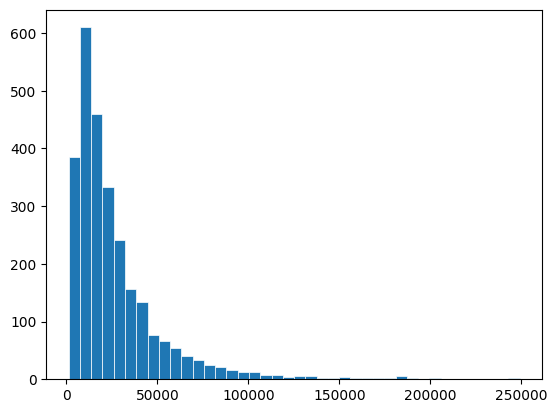

Contact Agent


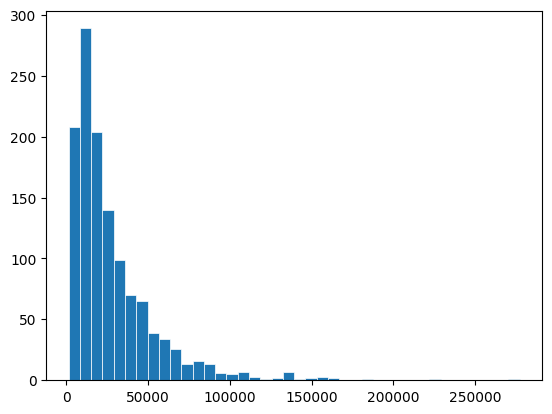

In [123]:
for col in data_from_model.select_dtypes(include=['object']):
    print(col)
    data_from_model[col].hist()
    
    i = 0
    fig, ax = plt.subplots()
    for val in data_from_model[col].unique():
        d = data_from_model[data_from_model[col] == val]
        x = d['Rent']
        y = d['Size']
        ax.set_xlabel('Rent')
        ax.set_ylabel('Size')
        ax.scatter(x, y, label=val, alpha=0.6, edgecolors='none')

    ax.legend()
    ax.grid(True)
    plt.show()

    for val in data_from_model[col].unique():
        fig, ax = plt.subplots()
        d = data_from_model[data_from_model[col] == val]
        ax.hist(d['Rent'], bins=40, linewidth=0.5, edgecolor="white")
        
        # ax.set(xlim=(0, 300000), ylim=(0, 6000))
        print(val)
        plt.show()

## Обучение линейной модели

### Преобразование категориальных переменных

Применим One-Hot-Encoding для преобразования категориальных переменных

In [125]:
cat_mask = data.select_dtypes(include=[object]).columns
cat_mask

Index(['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Point of Contact'],
      dtype='object')

In [126]:
data = pd.get_dummies(data, columns=cat_mask, drop_first=True)
data

,Rent,Size,Area Type_Super Area,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Owner
0,10000,1100,True,False,False,False,True,False,False,True,True,False,True
1,20000,800,True,False,False,False,True,False,True,False,True,False,True
2,17000,1000,True,False,False,False,True,False,True,False,True,False,True
3,10000,800,True,False,False,False,True,False,False,True,True,False,True
4,7500,850,False,False,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,15000,1000,False,False,False,True,False,False,True,False,True,False,True
4742,29000,2000,True,False,False,True,False,False,True,False,True,False,True
4743,35000,1750,False,False,False,True,False,False,True,False,True,False,False
4744,45000,1500,False,False,False,True,False,False,True,False,False,True,False


## Обучение модели

Разделим выборку на обучающую и тестовую

In [132]:
X = data.drop(['Rent'], axis=1)
y = data['Rent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

Обучим нашу модель

In [133]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [138]:
print(f'RMSE test: ', mean_squared_error(y_test, model.predict(X_test), squared=False))
print(f'MAE test: ', mean_absolute_error(y_test, model.predict(X_test)))

RMSE test:  24739.14563957833
MAE test:  15121.91050044721


## Отображение градиентного спуска

In [140]:
data_gradient = data_orig[['Rent', 'Size', 'Bathroom']]
data_gradient

,Rent,Size,Bathroom
0,10000,1100,2
1,20000,800,1
2,17000,1000,1
3,10000,800,1
4,7500,850,1
...,...,...,...
4741,15000,1000,2
4742,29000,2000,3
4743,35000,1750,3
4744,45000,1500,2


In [200]:
class BaseLoss(abc.ABC):
    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

In [201]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        Q = ((linalg.norm(np.dot(X,w) - y))**2)/len(y)
#         ((linalg.norm(np.dot((X, w) - y))**2))/len(y)
        return Q
        
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        diff = np.dot(X,w) - y
        Xt = np.transpose(X)
        grad = (2 * np.dot(Xt, diff)) / len(X)
        return grad

In [202]:
def gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, n_iterations: int = 100000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    
    W = [w_init]
    
    for i in range(n_iterations):
        w_init_new = W[-1] - lr * loss.calc_grad(X, y, W[-1])
        W.append(w_init_new)
        
    return W

In [406]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-1000, 1000, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)
            # print(loss.calc_loss(X, y, w_tmp))

    plt.figure(figsize=(20, 12))
    plt.title("GD trajectory")
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')
    # plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    # plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.xlim(-1000,1000)
    plt.ylim(-1000,1000)
    plt.gca().set_aspect('equal')

    # visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(0, 7, num=20), cmap=plt.cm.rainbow_r)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

In [408]:
loss = MSELoss()
w_init = [500, 500]
X = data_gradient.drop(['Rent'], axis=1)
y = data_gradient['Rent']

In [409]:
X['Size'] = X['Size']/100
X

,Size,Bathroom
0,11.0,2
1,8.0,1
2,10.0,1
3,8.0,1
4,8.5,1
...,...,...
4741,10.0,2
4742,20.0,3
4743,17.5,3
4744,15.0,2


In [410]:
y = y/100
y

0       100.0
1       200.0
2       170.0
3       100.0
4        75.0
        ...  
4741    150.0
4742    290.0
4743    350.0
4744    450.0
4745    150.0
Name: Rent, Length: 4746, dtype: float64

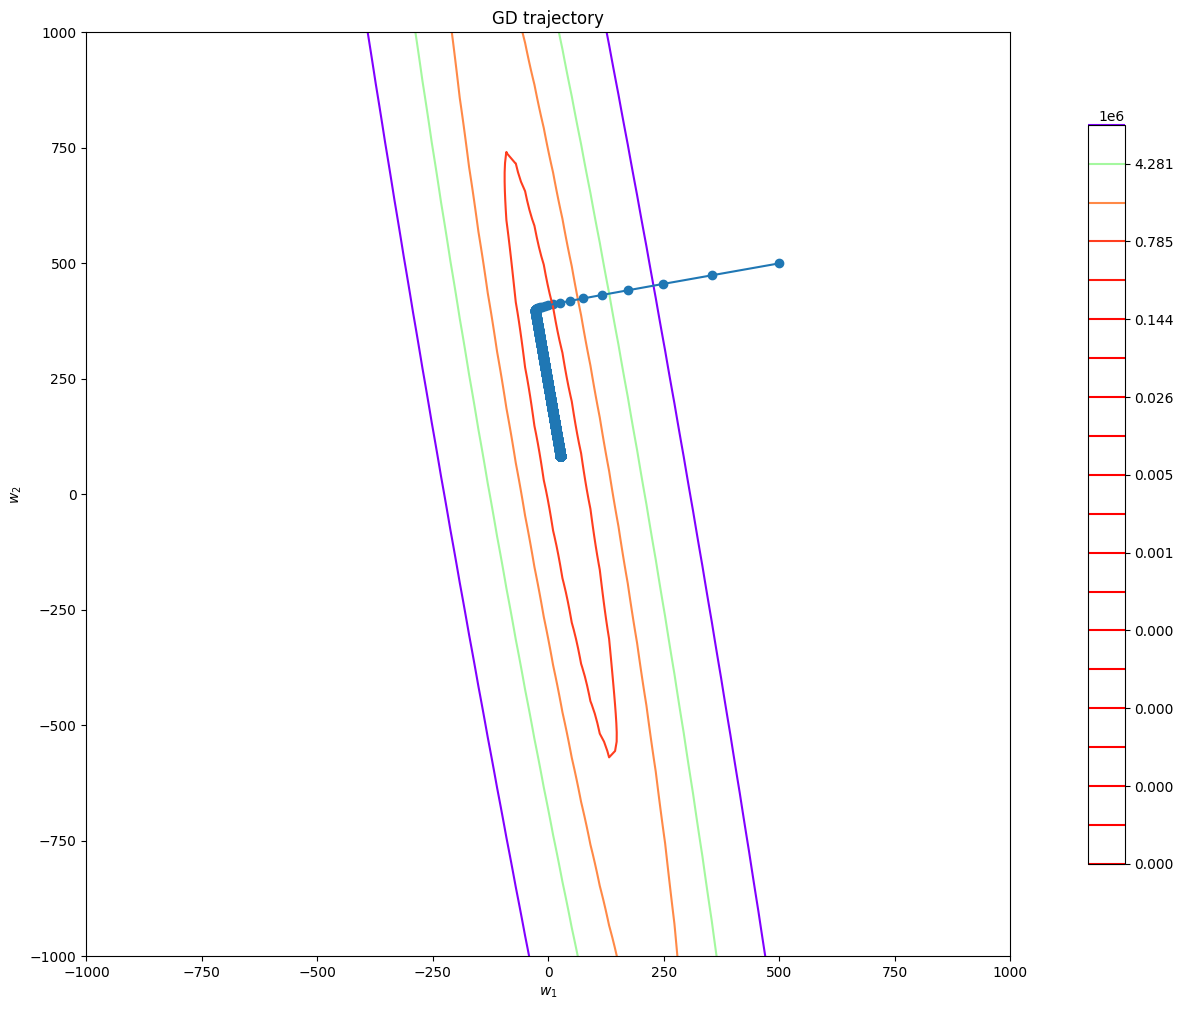

In [415]:
w_list = gradient_descent(w_init, X, y, loss, 0.001, 5000)
# print(w_list)
plot_gd(w_list, X, y, loss)